In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
def create_dic(filename):
    dic = {}
    f = open(filename, 'r')
    f.readline()
    for line in f:
        words = line.split(' ')
        dic[words[1][1:-3]] = []
    return dic

def get_dependencies(dic, filename):
    f = open(filename, 'r')
    f.readline()
    for line in f:
        words = line.split(' ')
        if words[3][:-3] != "None":
            dic[words[1][1:-3]].append(words[3][1:-4])

Before using these functions, the get_dependencies.py script must be run in order to create the dependencies text file.

In [3]:
dic = create_dic("../bigbang/dependencies.txt")
get_dependencies(dic, "../bigbang/dependencies.txt")
print(dic)

{'scipy/sparse/sputils.py': ['warnings.py', 'numpy', 'scipy/sparse/base.py'], 'test_client_regress/views.py': ['json'], 'defer_regress/models.py': [], 'migrations/test_migrations_squashed_complex_multi_apps/app1/3_auto.py': [], 'template_tests': [], 'django/contrib/sitemaps': [], 'sample_xblocks/basic': [], 'django/contrib/gis/geos/prototypes/predicates.py': ['ctypes'], 'auth_tests/test_middleware.py': [], 'migrations/test_migrations_no_ancestor/0002_second.py': [], 'vq.py': ['sys', 'time.so', 'numpy'], 'csrf_tests': [], 'django/contrib/gis/geos/io.py': [], 'django/contrib/auth/handlers': [], 'django/core/management/commands': [], 'django/conf/locale/id/formats.py': [], 'django/contrib/gis/db/backends/base/features.py': ['functools.py'], 'django/middleware/locale.py': [], 'django/middleware/clickjacking.py': [], 'django/utils/tree.py': ['copy.py'], 'template_tests/filter_tests/test_truncatechars_html.py': [], 'migrations/migrations_test_apps/lookuperror_b/migrations/0001_initial.py': [

In [4]:
def create_graph(dic):
    G = nx.DiGraph()
    
    for f in dic:
        for dependency in dic[f]:
            #print dependency
            G.add_edge(f, dependency)
            
    return G

In [5]:
G = create_graph(dic)

-0.159333153686


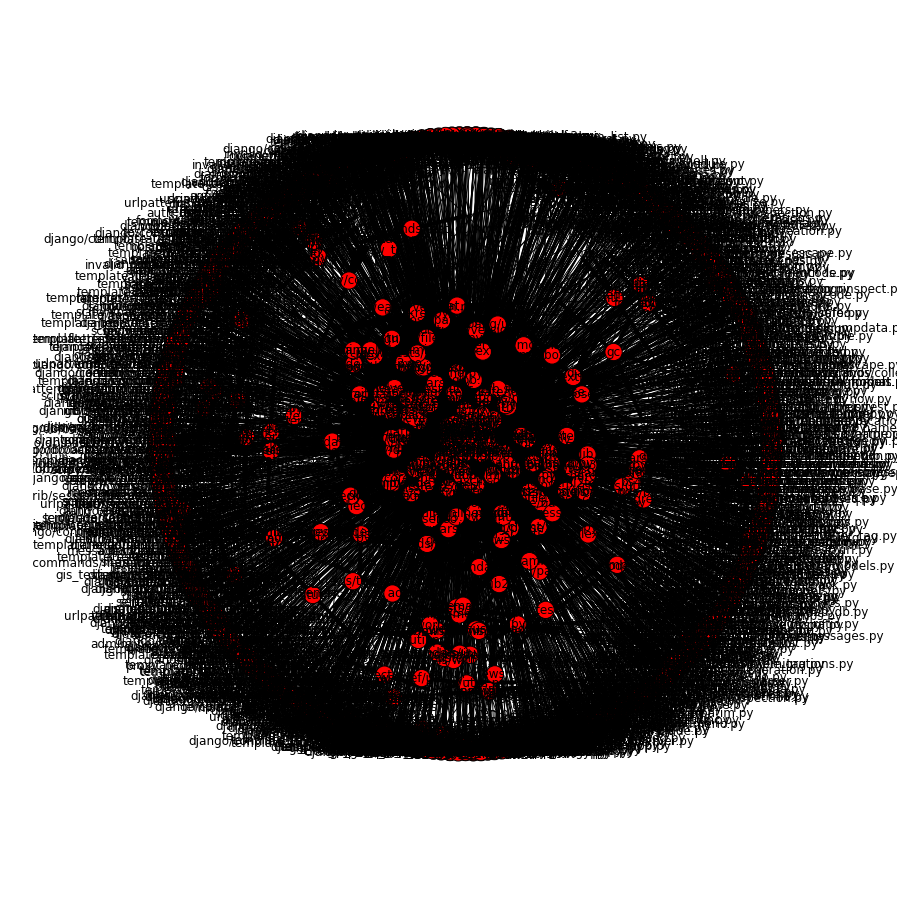

In [6]:
plt.figure(3,figsize=(12,12)) 
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=8, with_labels = False)

nx.draw_networkx_labels(G, pos);

print(nx.degree_assortativity_coefficient(G))

In [6]:
nx.write_gexf(G,'depen)